# Drug Review Diagnosis



## Data Preparation

### 1. Import Modules

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tensorflow import keras

# download Punkt Sentence Tokenizer
nltk.download('punkt')
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True


### 2. Download & Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# the path to the Drug Reviews dataset
dataset_path = '/content/drive/MyDrive/drugsComTrain_raw.csv'  

# read file (dataset) into our program using pandas
data = pd.read_csv(dataset_path, engine='python', encoding='utf-8', error_bad_lines=False) 

# display first 5 rows
data.head()  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37



### 3. Feature Engineering

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [ ]:
data.isna().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [ ]:
data.dropna(axis=0, inplace=True)
data.drop("uniqueID", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   drugName     160398 non-null  object
 1   condition    160398 non-null  object
 2   review       160398 non-null  object
 3   rating       160398 non-null  int64 
 4   date         160398 non-null  object
 5   usefulCount  160398 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 8.6+ MB


In [ ]:
data['condition'].value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [ ]:
data = data[data['condition'] != 'Birth Control']
data

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
...,...,...,...,...,...,...
161292,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [ ]:
count_of_conditions = data['condition'].value_counts().to_dict()
count_of_conditions = list(count_of_conditions.keys())
top_10_conditions = count_of_conditions[:10]
top_10_conditions

['Depression',
 'Pain',
 'Anxiety',
 'Acne',
 'Bipolar Disorde',
 'Insomnia',
 'Weight Loss',
 'Obesity',
 'ADHD',
 'Diabetes, Type 2']

In [ ]:
data = data[data['condition'].isin(top_10_conditions)]
data

,drugName,condition,review,rating,date,usefulCount
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54
15,Liraglutide,Obesity,"""I have been taking Saxenda since July 2016. ...",9,19-Jan-17,20
18,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",10,9-Nov-14,18
...,...,...,...,...,...,...
161277,Zolpidem,Insomnia,"""I started taking this medication 10 years ago...",10,16-Nov-08,103
161278,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,23-Oct-15,47
161283,Geodon,Bipolar Disorde,"""I was in a very bad place at the time I start...",3,25-Jul-16,5
161286,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,17-Jul-16,33


In [ ]:
data['condition'].value_counts()

Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Diabetes, Type 2    2554
Name: condition, dtype: int64


### 4. Clean Reviews 

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

english_stopwords = stopwords.words('english')
stemmer = PorterStemmer()

def clean_review(text):
  # convert to lower case
  text = text.lower()

  # remove none alphabetic characters
  text = re.sub(r'[^a-z]', ' ', text)

  # stem words 
  # split into words
  tokens = word_tokenize(text)

  # stemming of words
  stemmed = [stemmer.stem(word) for word in tokens]

  text = ' '.join(stemmed)

  # remove stopwords
  text = ' '.join([word for word in text.split() if word not in english_stopwords])

  return text


# apply to all dataset
data['clean_review'] = data['review'].apply(clean_review)
data.head()

,drugName,condition,review,rating,date,usefulCount,clean_review
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway hi fourth week intuniv becam conce...
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,abilifi chang life hope wa zoloft clonidin fir...
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54,taken anti depress year improv mostli moder se...
15,Liraglutide,Obesity,"""I have been taking Saxenda since July 2016. ...",9,19-Jan-17,20,take saxenda sinc juli sever nausea month onc ...
18,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",10,9-Nov-14,18,everi medicin sun seem manag hypomania mania b...



### 5. One-Hot-Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

Y = data['condition']
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_Y = to_categorical(encoded_Y)


## Data Split

In [ ]:
from sklearn.model_selection import train_test_split
 
X = data['clean_review']

# Split data into 80% training & 20% test
x_train, x_test, y_train, y_test = train_test_split(X, dummy_Y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(38173,) (38173, 10)
(9544,) (9544, 10)



## Feature Extraction with Word Embeddings

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# define your tokenizer (with num_words=10000)
tokenizer_obj = Tokenizer(num_words=10000)

# assign an index (number) to each word using fit_on_texts function  
tokenizer_obj.fit_on_texts(x_train)

# will be used later to pad sequences             
max_length = 120

# define vocabulary size
vocab_size = len(tokenizer_obj.word_index) + 1

# transform each text to a sequence of integers (to be used later in embeddings layer)
X_train_tokens =  tokenizer_obj.texts_to_sequences(x_train)
X_test_tokens = tokenizer_obj.texts_to_sequences(x_test)

# apply post-padding to the sequences
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')


## Build RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

embedding_dim = 300

# build the neural network
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length, embeddings_initializer="uniform"))
model.add(Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))

# compile model: assign loss & optimizer
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 300)          4590300   
                                                                 
 bidirectional (Bidirectiona  (None, 100)              140400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 4,736,260
Trainable params: 4,736,260
Non-trainable params: 0
_________________________________________________________________



## Training The Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath="weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# train model
model.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_test_pad, y_test), callbacks=callbacks_list) 

Epoch 1/5
1193/1193 [==============================] - ETA: 0s - loss: 0.7868 - accuracy: 0.7182
Epoch 1: val_accuracy improved from -inf to 0.80920, saving model to weights_best.hdf5
1193/1193 [==============================] - 1199s 999ms/step - loss: 0.7868 - accuracy: 0.7182 - val_loss: 0.5369 - val_accuracy: 0.8092
Epoch 2/5
1193/1193 [==============================] - ETA: 0s - loss: 0.4523 - accuracy: 0.8375
Epoch 2: val_accuracy improved from 0.80920 to 0.81412, saving model to weights_best.hdf5
1193/1193 [==============================] - 1137s 953ms/step - loss: 0.4523 - accuracy: 0.8375 - val_loss: 0.5156 - val_accuracy: 0.8141
Epoch 3/5
1193/1193 [==============================] - ETA: 0s - loss: 0.3615 - accuracy: 0.8687
Epoch 3: val_accuracy improved from 0.81412 to 0.83005, saving model to weights_best.hdf5
1193/1193 [==============================] - 1129s 946ms/step - loss: 0.3615 - accuracy: 0.8687 - val_loss: 0.4949 - val_accuracy: 0.8301
Epoch 4/5
1193/1193 [=======


## Evaluate The Model

In [ ]:
results = model.evaluate(X_test_pad, y_test, batch_size=128, verbose=0)
print("test loss, test acc:", results)

test loss, test acc: [0.5245049595832825, 0.8343461751937866]



## Save and Load The Model

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk



## Data Preparation For Another Model


### 1. Normalisation For Numerical Values

In [ ]:
rating_max = data['rating'].max()
usefulCount_max = data['usefulCount'].max()

data['rating'] = data['rating'].divide(rating_max)
data['usefulCount'] = data['usefulCount'].divide(usefulCount_max)

data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,rating,usefulCount
count,47717.000000,47717.000000
mean,0.736119,0.029549
std,0.307678,0.034214
min,0.100000,0.000000
25%,0.600000,0.009295
50%,0.900000,0.019365
75%,1.000000,0.037180
max,1.000000,1.000000



### 2. Label Encoding For Categorical Values

In [ ]:
encoder = LabelEncoder()
encoder.fit(data['drugName'])
encoded_drugName = encoder.transform(data['drugName'])
data['encoded_drugName'] = encoded_drugName.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.



### Data Split 2

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['rating', 'usefulCount', 'encoded_drugName']]
x_train, x_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.2, random_state=42)


### Model 2 Building & Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define the LogisticRegression classifier
model2 = RandomForestClassifier()

# train the classifier on the training data
model2.fit(x_train, y_train)

# get the mean accuracy on the training data
acc_train = model2.score(x_train, y_train)  

print('Training Accuracy:', acc_train)

Training Accuracy: 0.9502527964791868



### Evaluate Model 2

In [ ]:
# Evaluate model with test data

acc_test = model2.score(x_test, y_test)  
print('Test Accuracy:', acc_test)

Test Accuracy: 0.576487845766974



### Plot Important Features

In [ ]:
model2.feature_importances_

array([0.02855805, 0.19073829, 0.78070366])

,Feature,Importance
2,encoded_drugName,0.780704
1,usefulCount,0.190738
0,rating,0.028558


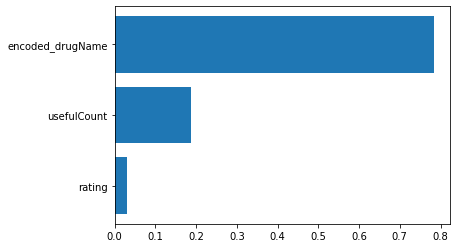

In [ ]:
from matplotlib import pyplot as plt

plt.barh(x_train.columns, model.feature_importances_)
importance = pd.DataFrame()
importance['Feature'] = x_train.columns
importance['Importance'] = model2.feature_importances_
importance = importance.sort_values(by = ['Importance'], ascending = False)
importance


### Comparing Results 

In [ ]:
y_pred = model.predict(x_test).tolist()
y_test = y_test.tolist()

comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['Predicted'] = y_pred
comparison

,Actual,Predicted
0,1,1
1,1,1
2,4,4
3,1,7
4,4,0
...,...,...
9539,2,6
9540,4,4
9541,1,4
9542,1,1


In [ ]:
comparison['Actual'].value_counts()

4    1767
2    1267
8    1204
1    1131
3     798
9     741
6     726
7     720
0     695
5     495
Name: Actual, dtype: int64

In [ ]:
comparison['Predicted'].value_counts()

4    1885
2    1213
1    1160
8    1145
3     851
9     780
7     748
0     678
6     668
5     416
Name: Predicted, dtype: int64